In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
# Reading the first dataset
dataset1 = pd.read_csv('Problem2.csv')

# Displaying the first 5 rows
dataset1.head()


,area,lot_area,year_built,bedroom,bathroomfull,halfbath,story,price
0,940,370014,1978,1,1,0,2,61000
1,568,185548,0,1,1,0,1,80000
2,568,0,1980,1,1,0,1,82000
3,684,337435,1977,1,1,0,1,83000
4,616,370014,1978,1,1,0,1,84000


In [36]:
Y_data = dataset1.price
X_data = dataset1.drop(columns='price')

In [37]:
X_data

,area,lot_area,year_built,bedroom,bathroomfull,halfbath,story
0,940,370014,1978,1,1,0,2
1,568,185548,0,1,1,0,1
2,568,0,1980,1,1,0,1
3,684,337435,1977,1,1,0,1
4,616,370014,1978,1,1,0,1
...,...,...,...,...,...,...,...
500,5152,16631,0,5,6,0,2
501,5119,20245,0,4,3,2,1
502,3192,4607,2023,4,3,0,3
503,3528,5299,2023,4,3,0,3


In [38]:
Y_data

0        61000
1        80000
2        82000
3        83000
4        84000
        ...   
500    1490000
501    1950000
502    2155000
503    2449000
504    3926000
Name: price, Length: 505, dtype: int64

In [39]:
# Splitting the data into training and test data, using a 80-20 split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_data, Y_data, train_size = 0.8, random_state = 420)

# Printing the shapes of the training and testing data
print(X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape)

(404, 7) (101, 7) (404,) (101,)


In [42]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu,input_shape=[7]), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 3, ReLU activation
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 4, ReLU activation
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 5, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear) # ouput layer, sigmoid activation
])

# Compile the model
model.compile(loss=tf.keras.losses.mean_squared_logarithmic_error,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model.fit(X_Train, Y_Train, epochs=1000, verbose=2)

# View the predictions of the model with relu and sigmoid activations
# plot_decision_boundary(model_2, X_Train, Y_Train)

Epoch 1/1000
13/13 - 0s - loss: 163.6711 - accuracy: 0.0000e+00
Epoch 2/1000
13/13 - 0s - loss: 161.6769 - accuracy: 0.0000e+00
Epoch 3/1000
13/13 - 0s - loss: 147.2230 - accuracy: 0.0000e+00
Epoch 4/1000
13/13 - 0s - loss: 98.0213 - accuracy: 0.0000e+00
Epoch 5/1000
13/13 - 0s - loss: 44.6478 - accuracy: 0.0000e+00
Epoch 6/1000
13/13 - 0s - loss: 39.4172 - accuracy: 0.0000e+00
Epoch 7/1000
13/13 - 0s - loss: 37.3925 - accuracy: 0.0000e+00
Epoch 8/1000
13/13 - 0s - loss: 36.1117 - accuracy: 0.0000e+00
Epoch 9/1000
13/13 - 0s - loss: 35.0460 - accuracy: 0.0000e+00
Epoch 10/1000
13/13 - 0s - loss: 34.0488 - accuracy: 0.0000e+00
Epoch 11/1000
13/13 - 0s - loss: 32.9965 - accuracy: 0.0000e+00
Epoch 12/1000
13/13 - 0s - loss: 31.8042 - accuracy: 0.0000e+00
Epoch 13/1000
13/13 - 0s - loss: 29.8685 - accuracy: 0.0000e+00
Epoch 14/1000
13/13 - 0s - loss: 27.4389 - accuracy: 0.0000e+00
Epoch 15/1000
13/13 - 0s - loss: 25.0646 - accuracy: 0.0000e+00
Epoch 16/1000
13/13 - 0s - loss: 22.9614 - acc

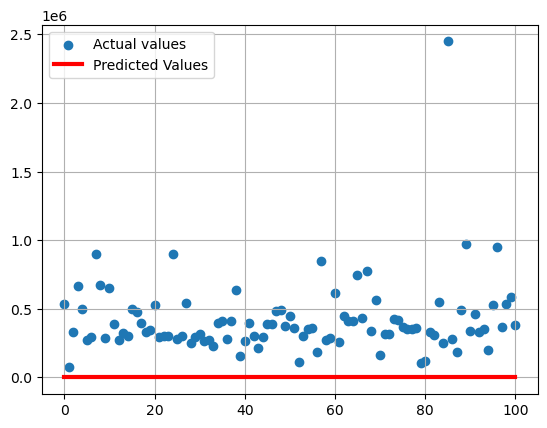

In [43]:
# Compute the output 

# Predicting the result values using our model
y_pred = model.predict(X_Test)

# Encoding values that greater than or equal to 0.5 as 1, otherwise as 0
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

# Plotting a Scatter Plot for the Actual values
plt.scatter(range(len(Y_Test)), Y_Test, label = "Actual values")

# overlays a line plot of the predicted labels y_pred on top of the scatter plot using the plt.plot function. The predicted labels are plotted in red with a line width of 3 and color "red".
plt.plot(range(len(y_pred)), y_pred, 'r', linewidth = 3, label = "Predicted Values")

# Add grid and legend to the plot
plt.grid()
plt.legend()

# Display the plot
plt.show()

In [44]:
print(accuracy_score(Y_Test,y_pred))

0.0
